In [1]:
install.packages("neuralnet") 
library(neuralnet)

package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\b\AppData\Local\Temp\RtmpGe9cUl\downloaded_packages


Warning message:
"package 'neuralnet' was built under R version 3.6.3"

In [2]:
setwd("C:/Users/b/Documents")

In [3]:
myLoans <- read.csv("mldata/myLoans.csv", TRUE, ",")
head(myLoans)

clientid,inc,attained.age,borrowed,redundant_feature,answer
1,66155.93,59.01702,8106.5321,0.122536751,0
2,34415.15,48.11715,6564.7450,0.190751581,0
3,57317.17,63.10805,8020.9533,0.139939800,0
4,42709.53,45.75197,6103.6423,0.142910532,0
5,66952.69,18.58434,8770.0992,0.130989500,1
6,24904.06,57.47161,15.4986,0.000622332,0


In [4]:
normalize <- function(x) {return( (x-min(x)) / (max(x)-min(x)) )}

normalized_myLoans <- as.data.frame(lapply(myLoans[2:4], normalize))

normalized_myLoans$answer <-myLoans$answer
normalized_myLoans[1:5,]
normalized_myLoans[1996:2000,]

inc,attained.age,borrowed,answer
0.9231759,0.8920917,0.5888374,0
0.2881216,0.6547079,0.4768270,0
0.7463343,0.9811888,0.5826201,0
0.4540717,0.6031975,0.4433280,0
0.9391172,0.0115241,0.6370454,1


,inc,attained.age,borrowed,answer
1996,0.7844261,0.6634417,0.1398763,1
1997,0.9904052,0.1112215,0.2544048,1
1998,0.4861220,0.2169581,0.4011289,1
1999,0.4750100,1.0000000,0.1177903,1
2000,0.9888137,0.8297091,0.5359703,1


In [5]:
#train, test, and validate

training_data <- normalized_myLoans[1:1400,]

test_data <- normalized_myLoans[1401:1800,]

validation_data <- normalized_myLoans[1801:2000,]


In [6]:
neural_network <- neuralnet(answer~inc+attained.age+borrowed, training_data, hidden=5, 
                            act.fct = "logistic", linear.output = FALSE)

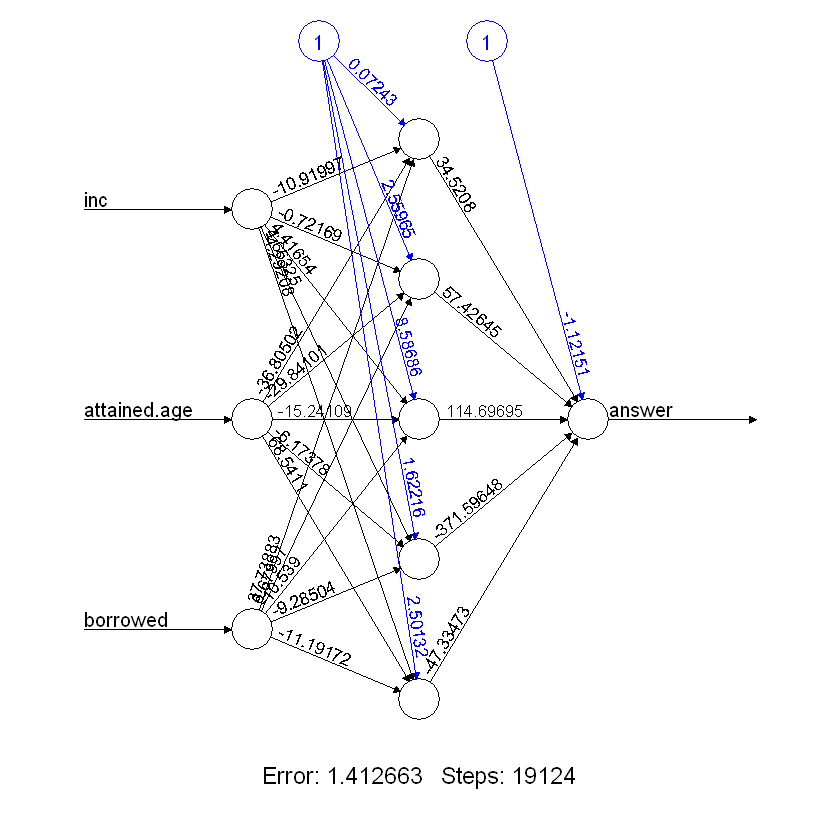

In [7]:
plot(neural_network, rep="best")

In [8]:

test_data2 <- subset(test_data,select=c("inc","attained.age","borrowed")) 
head(test_data,n=5) 
head(test_data2,n=5)

,inc,attained.age,borrowed,answer
1401,0.4843376,0.8233684,0.54066731,0
1402,0.9568550,0.6474213,0.40741605,0
1403,0.6801598,0.6828621,0.06417572,1
1404,0.6446342,0.6518190,0.67233453,0
1405,0.1682361,0.9499018,0.38369755,0


,inc,attained.age,borrowed
1401,0.4843376,0.8233684,0.54066731
1402,0.9568550,0.6474213,0.40741605
1403,0.6801598,0.6828621,0.06417572
1404,0.6446342,0.6518190,0.67233453
1405,0.1682361,0.9499018,0.38369755


In [9]:
predictions <- compute(neural_network, test_data2)
head(predictions$net.result,n=5)

1401,4.620426e-22
1402,2.552507e-36
1403,2.206185e-70
1404,4.260610e-22
1405,6.561195e-22


In [10]:
predictions <- round(predictions$net.result)
head(predictions,n=9)

1401,0
1402,0
1403,0
1404,0
1405,0
1406,0
1407,0
1408,0
1409,0


In [11]:
test_accuracy = mean(test_data$answer==predictions)
test_accuracy

[1] 0.99

In [12]:
validation_data2 <- subset(validation_data,select=c("inc","attained.age","borrowed"))
tail(validation_data,n=5)
tail(validation_data2,n=5)

,inc,attained.age,borrowed,answer
1996,0.7844261,0.6634417,0.1398763,1
1997,0.9904052,0.1112215,0.2544048,1
1998,0.4861220,0.2169581,0.4011289,1
1999,0.4750100,1.0000000,0.1177903,1
2000,0.9888137,0.8297091,0.5359703,1


,inc,attained.age,borrowed
1996,0.7844261,0.6634417,0.1398763
1997,0.9904052,0.1112215,0.2544048
1998,0.4861220,0.2169581,0.4011289
1999,0.4750100,1.0000000,0.1177903
2000,0.9888137,0.8297091,0.5359703


In [13]:
predictions2 <- compute(neural_network, validation_data2)
tail(predictions2$net.result,n=5)

1996,6.285061e-67
1997,5.089837e-112
1998,9.999993e-01
1999,1.169443e-26
2000,8.203405e-25


In [14]:
predictions2 <- round(predictions2$net.result)
tail(predictions2,n=9)

1992,0
1993,0
1994,0
1995,0
1996,0
1997,0
1998,1
1999,0
2000,0


In [15]:
validation_accuracy = mean(validation_data$answer==predictions2)
validation_accuracy 

[1] 0.97

Given an Error of 1.539 in the neural network plot, this shows a 98.5% accuracy for the training set.

In order to change this from classification application to regression which produces a single value, we need to make changes to the activation function and more layers to achieve result.

The purpose of this project is to gain more knowledge on Classification Application of neural network. Specifically, i gained in-dept knowledge on what goes on within the backend of data training. Understanding the links among the input values, weighted values, activation process, hidden layers, and finally the output is fascinating and will be of great help moving forward in Machine Learning practicals.